# **Data analysis on World cup dataset**

---
---

# 0. Getting Ready

## 0.1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0.2. Describe the dataset and set our questions

### 0.2.1. Describe the dataset

This dataset is imported from [kaggle](https://kaggle.com) and it serves basic information about World cup

### 0.2.2. Ask questions


1.   Which teams have won the world cup, and which team has won it the most ?
2.   Which teams are the most runner-ups?
3.   Which countries host world cup?
4.   How did the number of attendance change throughout the years (The overall of the championship)?
5.   How did the number of matches change throughout the years?
6.   How did the number of teams change throughout the years?
7.   How many teams from each federation have competed in World cup qualifications?
8.   Which team has the highest accumlated points?
9.  Which Team has the highest change in accumlated points?
10.  Which team has the highest rank?
11.  Which team has changed most in its rank?
12.  What is the relation between accumlated points and ranking?
13.  In which year has the top goalscorer scored the highest?

## 0.3. Import our datasets

In [2]:
general =pd.read_csv('world_cup.csv')
ranking = pd.read_csv('Ranking.csv')

#
---
---

# 1. Wrangling data

## 1.1. Assessing datasets

### 1.1.1. Assessing the ranking dataset


#### - View the shape of the dataset

In [3]:
# Get info of dataset
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             211 non-null    object 
 1   team_code        211 non-null    object 
 2   association      211 non-null    object 
 3   rank             211 non-null    int64  
 4   previous_rank    211 non-null    int64  
 5   points           211 non-null    float64
 6   previous_points  211 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.7+ KB


We notice that this dataset has 211 rows x 7 columns of types <br>
(Float64, Int64, and string)

The datatypes of columns are well-chosen according to the content, so no issue detected


#### - Check completeness

In [4]:
# Check null entries
ranking.isnull().sum().sum()

np.int64(0)

There are no null entries

#### - Check Uniqueness

In [5]:
# Check duplicates
ranking.duplicated().sum()

np.int64(0)

There are no duplicated entries

#### - Check accuracy

In [6]:
# View top 5 rows
ranking.head()

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46


In [7]:
# View bottom 5 rows
ranking.tail()

,team,team_code,association,rank,previous_rank,points,previous_points
206,Sri Lanka,SRI,AFC,207,207,825.25,825.25
207,US Virgin Islands,VIR,CONCACAF,208,208,823.97,823.97
208,British Virgin Islands,VGB,CONCACAF,209,209,809.32,809.32
209,Anguilla,AIA,CONCACAF,210,210,790.74,790.74
210,San Marino,SMR,UEFA,211,211,762.22,763.82


In [8]:
# View random 5 rows
ranking.sample(5)

,team,team_code,association,rank,previous_rank,points,previous_points
203,Gibraltar,GIB,UEFA,204,200,852.16,856.55
174,Nepal,NEP,AFC,175,176,954.86,950.45
69,United Arab Emirates,UAE,AFC,70,69,1337.57,1346.09
175,Belize,BLZ,CONCACAF,176,175,950.88,950.88
192,Djibouti,DJI,CAF,193,193,875.05,877.84


The data is free of logical errors

#### - Check timeliness

This data is for FIFA team ranking just before 2022 World cup which is what I am looking for

###
---

### 1.1.2. Assessing the general dataset

#### - View the shape of the dataset

In [9]:
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           22 non-null     int64 
 1   Host           22 non-null     object
 2   Teams          22 non-null     int64 
 3   Champion       22 non-null     object
 4   Runner-Up      22 non-null     object
 5   TopScorrer     22 non-null     object
 6   Attendance     22 non-null     int64 
 7   AttendanceAvg  22 non-null     int64 
 8   Matches        22 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 1.7+ KB


We can notice that the dataset is composed of 22 entries x 9 columns of types:<br>
(Float64, int64, string)

Dtypes are well-chosen for the columns

#### - Check Completeness

In [10]:
general.isnull().sum().sum()

np.int64(0)

No missing values found

#### - Check Uniqueness

In [11]:
general.duplicated().sum()

np.int64(0)

No duplicates found

#### - Check accuracy

In [12]:
general.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


In [13]:
general.tail()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
17,1954,Switzerland,16,Germany,Hungary,Sándor Kocsis - 11,768607,29562,26
18,1950,Brazil,15,Uruguay,Brazil,Ademir - 8,1045246,47511,22
19,1938,France,16,Italy,Hungary,Leônidas - 7,375700,20872,18
20,1934,Italy,16,Italy,Czechoslovakia,Oldřich Nejedlý - 5,363000,21353,17
21,1930,Uruguay,13,Uruguay,Argentina,Guillermo Stábile - 8,590549,32808,18


In [14]:
general.sample(5)

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64
15,1962,Chile,16,Brazil,Czechoslovakia,"Leonel Sánchez, Flórián Albert... - 4",893172,27912,32
8,1990,Italy,24,West Germany,Argentina,Salvatore Schillaci - 6,2516215,48389,52
20,1934,Italy,16,Italy,Czechoslovakia,Oldřich Nejedlý - 5,363000,21353,17
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64


Data is free of logical errors

#### - Check Timeliness

Data is historical and valid for all times

#### - Check Data tidiness

In [15]:
# View the (Top goalscorer) column
general['TopScorrer']

,TopScorrer
0,Kylian Mbappé - 8
1,Harry Kane - 6
2,James Rodríguez - 6
3,"Wesley Sneijder, Thomas Müller... - 5"
4,Miroslav Klose - 5
5,Ronaldo - 8
6,Davor Šuker - 6
7,"Hristo Stoichkov, Oleg Salenko - 6"
8,Salvatore Schillaci - 6
9,Gary Lineker - 6


When viewing this column, we notice that this column is violating a tidiness rule, which is:
* Each column represents a variable <br>

whereas this column is representing two variables which are the goalscorer name and the number of goals he had scored

###

---



### 1.1.3. Summary of assessment

#### 1.1.3.1. Assessment of Ranking dataset

**A. Cleanliness:**
1.   Completeness: Data is complete
2.   Accuracy: Data is accurate
3.   Timeliness: The data is up-to-date
4.   Uniqueness: Data is unique
5.   Invalid dtypes: Dtypes are well-chosen

**B. Tidiness**<br>
The data is not volatiling the basic rules of data tidiness:
1.   Each column represents a variable
1.   Each row represents a observation
2.   A table represents a group of relevant data

#### 1.1.3.2. Assessment of General dataset

**A. Cleanliness:**
1.   Completeness: Data is complete
2.   Accuracy: Data is accurate
3.   Timeliness: The data is up-to-date
4.   Uniqueness: Data is unique
5.   Invalid dtypes: Dtypes are well-chosen

**B. Tidiness**<br>
The top scorer column is violating a tidiness rule which is <br>**Each column represents a variable**

##
---

## 1.2. Cleaning datasets

### 1.2.1. Clean the ranking dataset

The dataset has nothing to be cleaned and is ready to be analysed

###
---

### 1.2.2. Clean the general dataset

#### => Objective: Fix the tidiness issue of the top scorer dataset

In [16]:
# Extract digits from the top scorrer column
general.insert(6, "Number of goals", general['TopScorrer'].str.extract(r'(\d+)'))

# Remove the - number of goals from top scorrer column
general['TopScorrer'] = general['TopScorrer'].str.replace(r"- (\d+)", "", regex=True)

# Change dtype of the number of goals
general['Number of goals'] = general['Number of goals'].astype(int)

#### Test to check if it works

In [17]:
general.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Number of goals,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé,8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane,6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez,6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller...",5,3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose,5,3352605,52384,64


###
---

### 1.2.3. Summary of cleaning data

- **Ranking dataset**: Didn't need to be cleaned
- **General dataset**: Fixed the top goalscorer tidiness issue

#
---
---

# 2. Data Analysis and Visualisation

## Question 1: Which teams have won the world cup, and which team has won it the most ?

According to the general knowledge, it's expected to be Brazil

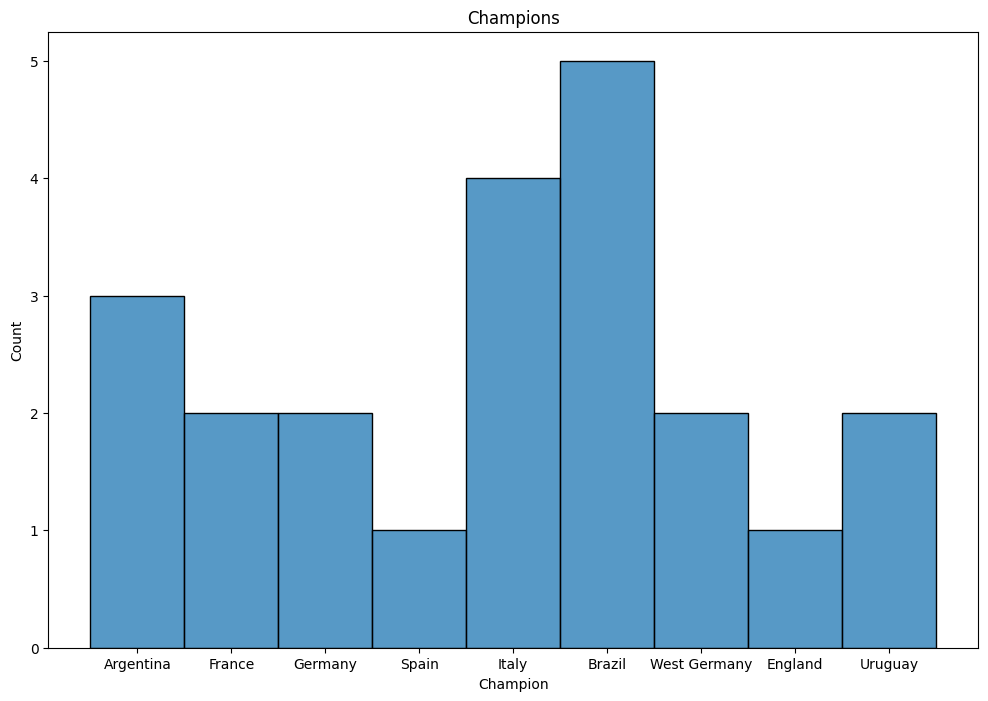

In [18]:
plt.figure(figsize=(12, 8))
plt.title("Champions")
sns.histplot(data=general, x='Champion')
plt.show()

As expected, Brazil is the most winner with 5 trophies. The other teams who won the World cup are:

1.  Italy : 4 trophies
2.  Argentina : 3 trophies
3.  France, Germany, West Germany and Uruguay: 2 trophies each
4.  Spain and England: 1 trophy each



## Question 2: Which teams are the most runner-ups?

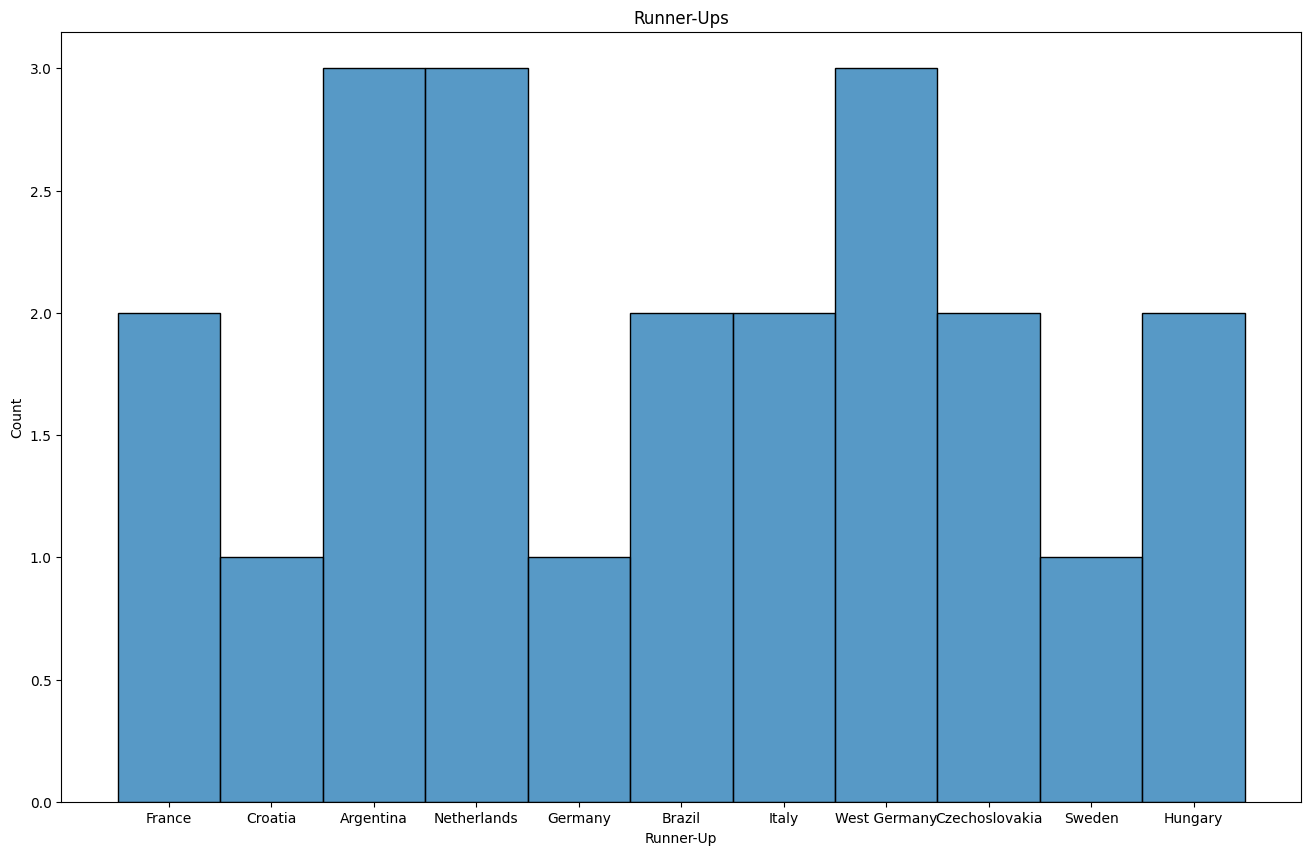

In [19]:
plt.figure(figsize=(16, 10))
plt.title("Runner-Ups")
sns.histplot(data=general, x='Runner-Up')
plt.show()

The most runner-ups are Netherlands, Argentina and West Germany with 3 times each

## Question 3: Which countries host world cup?

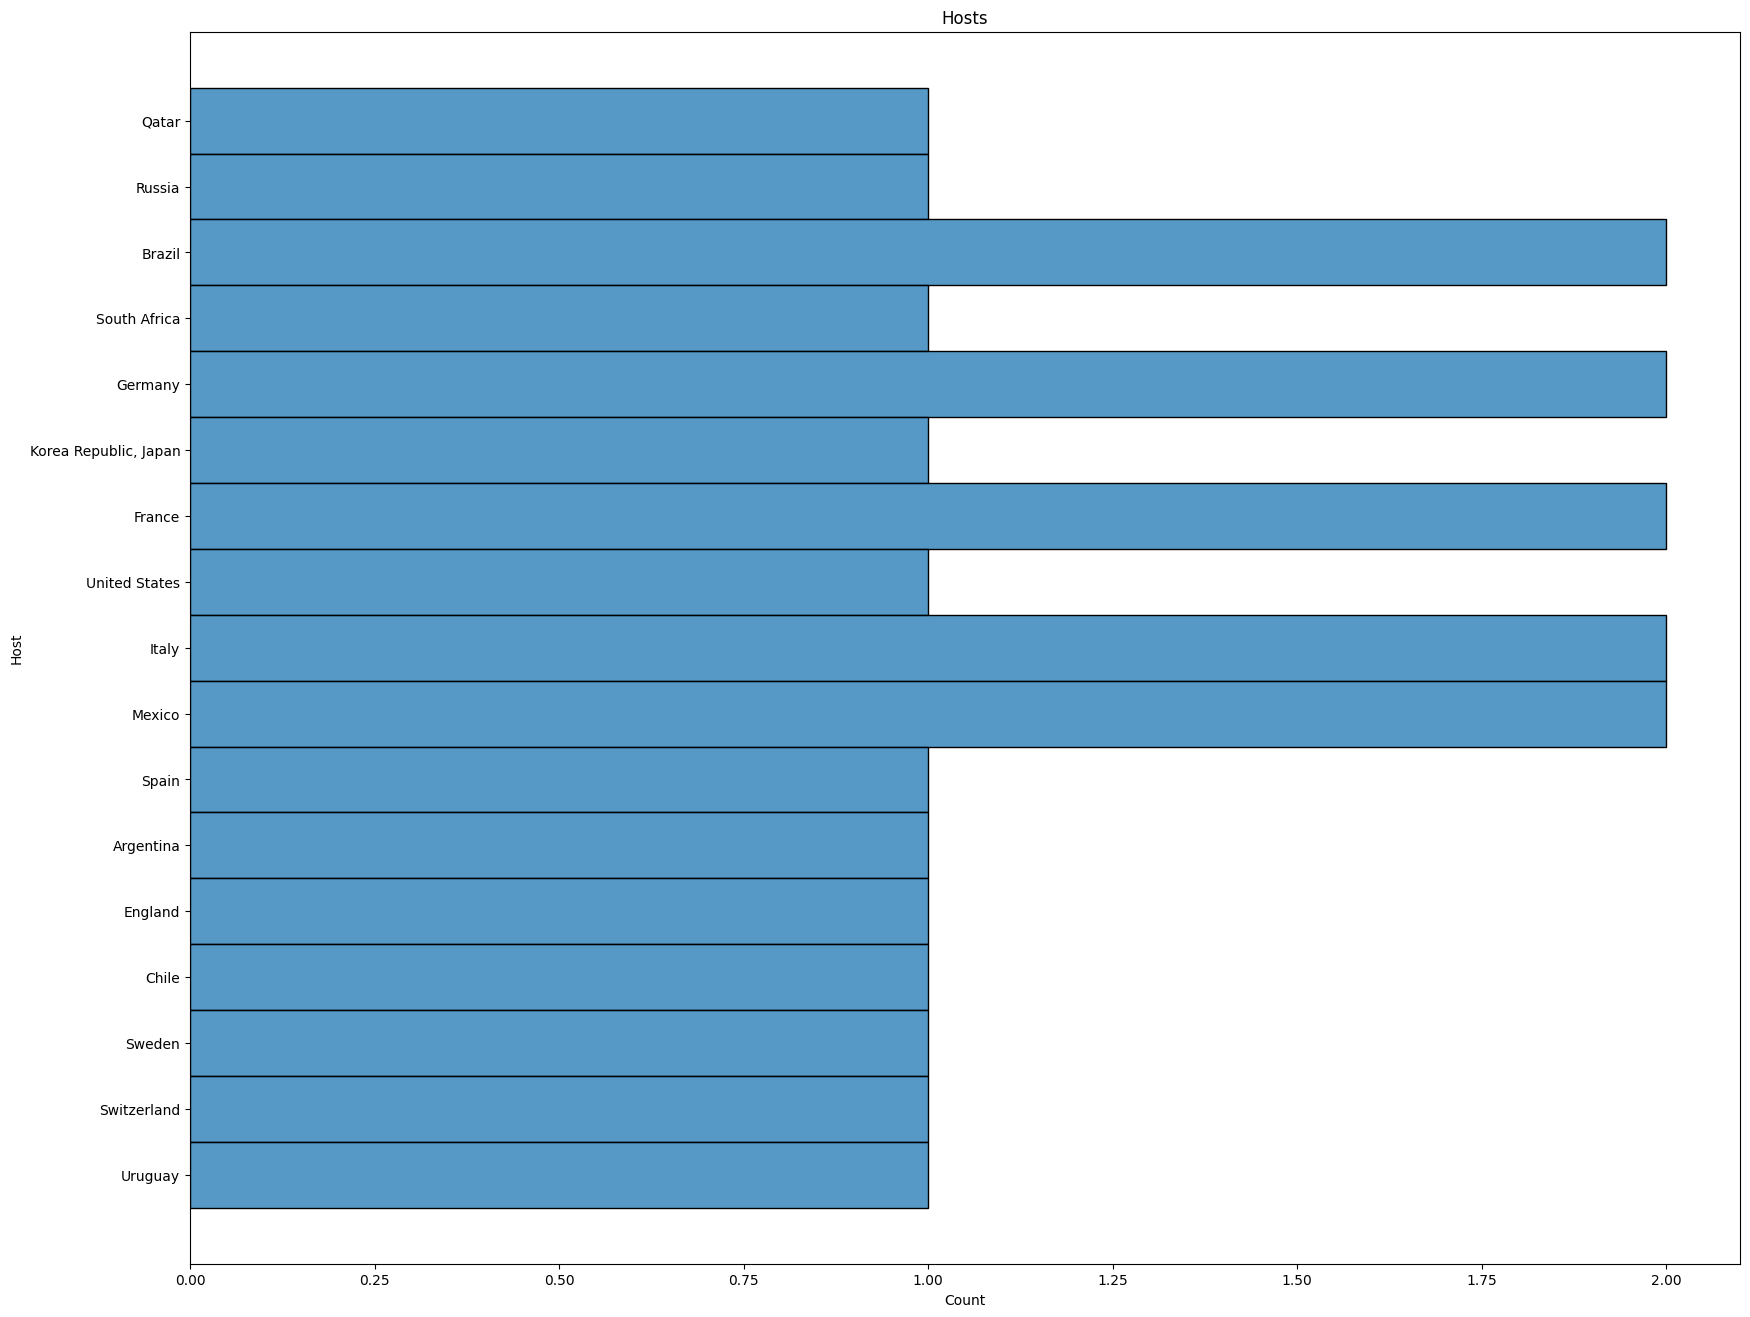

In [20]:
plt.figure(figsize=(20, 16))
plt.title("Hosts")
sns.histplot(data=general, y='Host')
plt.show()

The most countries hosted the world cup are:
1.   Brazil
2.   Germany
3.   France
4.   Italy
5.   Mexico

with 2 times each

## Question 4: How did the number of attendance change throughout the years (The overall of the championship)?

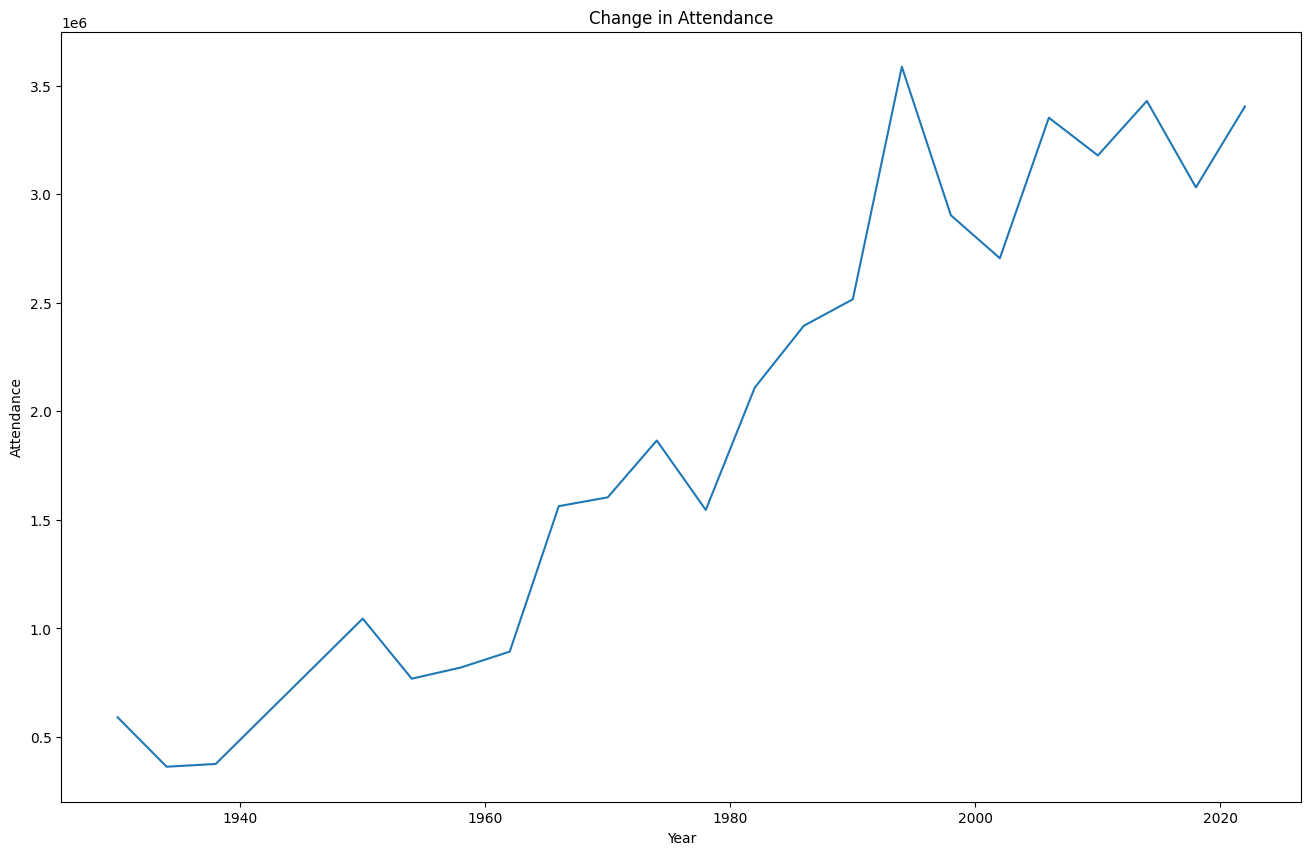

In [21]:
plt.figure(figsize=(16, 10))
plt.title("Change in Attendance")
sns.lineplot(data=general, x='Year', y='Attendance')
plt.show()

The attendance has increased from 500,000 in 1930 to 3,500,000 in 1994 then decreased to approximately 3,400,000 in 2022, and the highest attendance was in 1994 Fifa world cup as we see in this query

- **Check the data itself using methods**

In [22]:
general[general['Attendance'] == max(general['Attendance'])]

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Number of goals,Attendance,AttendanceAvg,Matches
7,1994,United States,24,Brazil,Italy,"Hristo Stoichkov, Oleg Salenko",6,3587538,68991,52


In [23]:
general[general['Attendance'] == min(general['Attendance'])]

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Number of goals,Attendance,AttendanceAvg,Matches
20,1934,Italy,16,Italy,Czechoslovakia,Oldřich Nejedlý,5,363000,21353,17


## Question 5: How did the number of matches per cup change throughout the years?

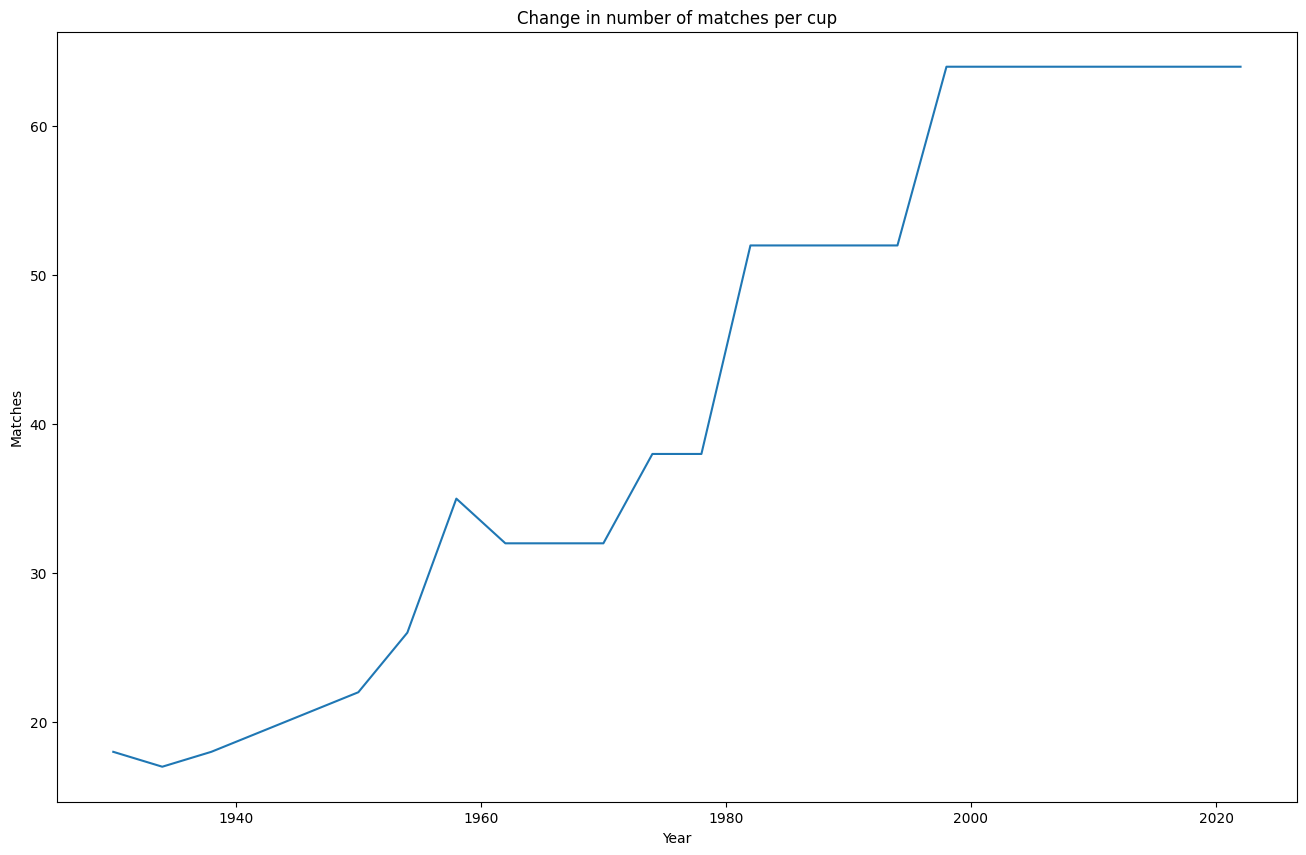

In [24]:
plt.figure(figsize=(16, 10))
plt.title("Change in number of matches per cup")
sns.lineplot(data=general, x='Year', y='Matches')
plt.show()

*Commentary*<br>
It first was 18 matches in 1930, then it decreased to 17 matches in 1934, then returned back to 18, increased to 22 matches, then increased to 26 matches, again to 35 matches in 1960, but decreased to 32 matches after that it increased to 38 matches in 1974 & 1978. Later on it increased to 52 matches in 1982, then remained at 52 matches until 1998 when it increased to 64 matches. From 1998 till 2022, it remained at 64 matches

**We can conclude that the period between 1930 ~ 1978 experienced inconsistency in the number of matches where it increased or decreased each round, but from 1982 ~ 2022, the number of matches only changed twice, which reflects the more consistency this period has seen related to the previous one**

## Question 6: How did the number of teams change throughout the years?

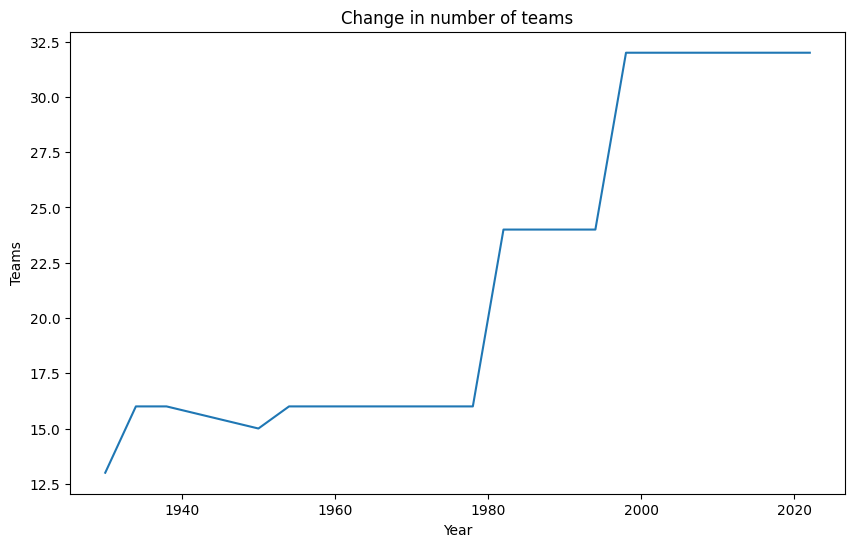

In [25]:
plt.figure(figsize=(10, 6))
plt.title("Change in number of teams")
sns.lineplot(data=general, x='Year', y='Teams')
plt.show()

As a result of the inconsistency in the number of matches the period 1930 ~ 1978 has seen, the number of teams has been also inconsistent. But in the period 1982 ~ 2022 the number of teams has only changed twice which reflects the consistency this period has seen

## Question 7: How many teams from each federation have competed in World cup qualifications?

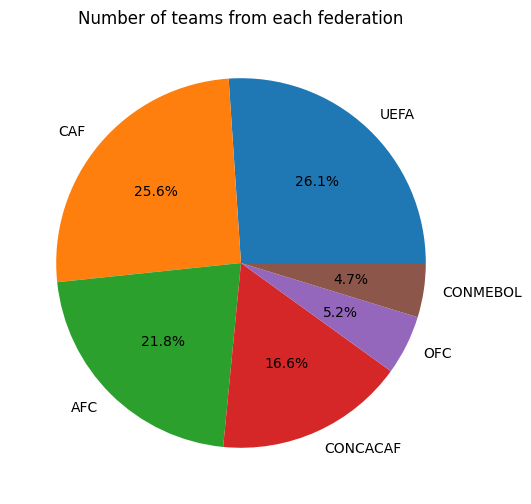

In [26]:
plt.figure(figsize=(10, 6))
plt.title("Number of teams from each federation")
plt.pie(data=ranking, x=ranking['association'].value_counts(), \
        labels=ranking['association'].value_counts().index, autopct='%1.1f%%')
plt.show()

We can see that the UEFA association has the highest percentage of teams competing in Fifa World cup qualifications (26.1%) followed by CAF (25.6%), followed by AFC (21.8%)

## Question 8: Which team has the highest accumlated points?

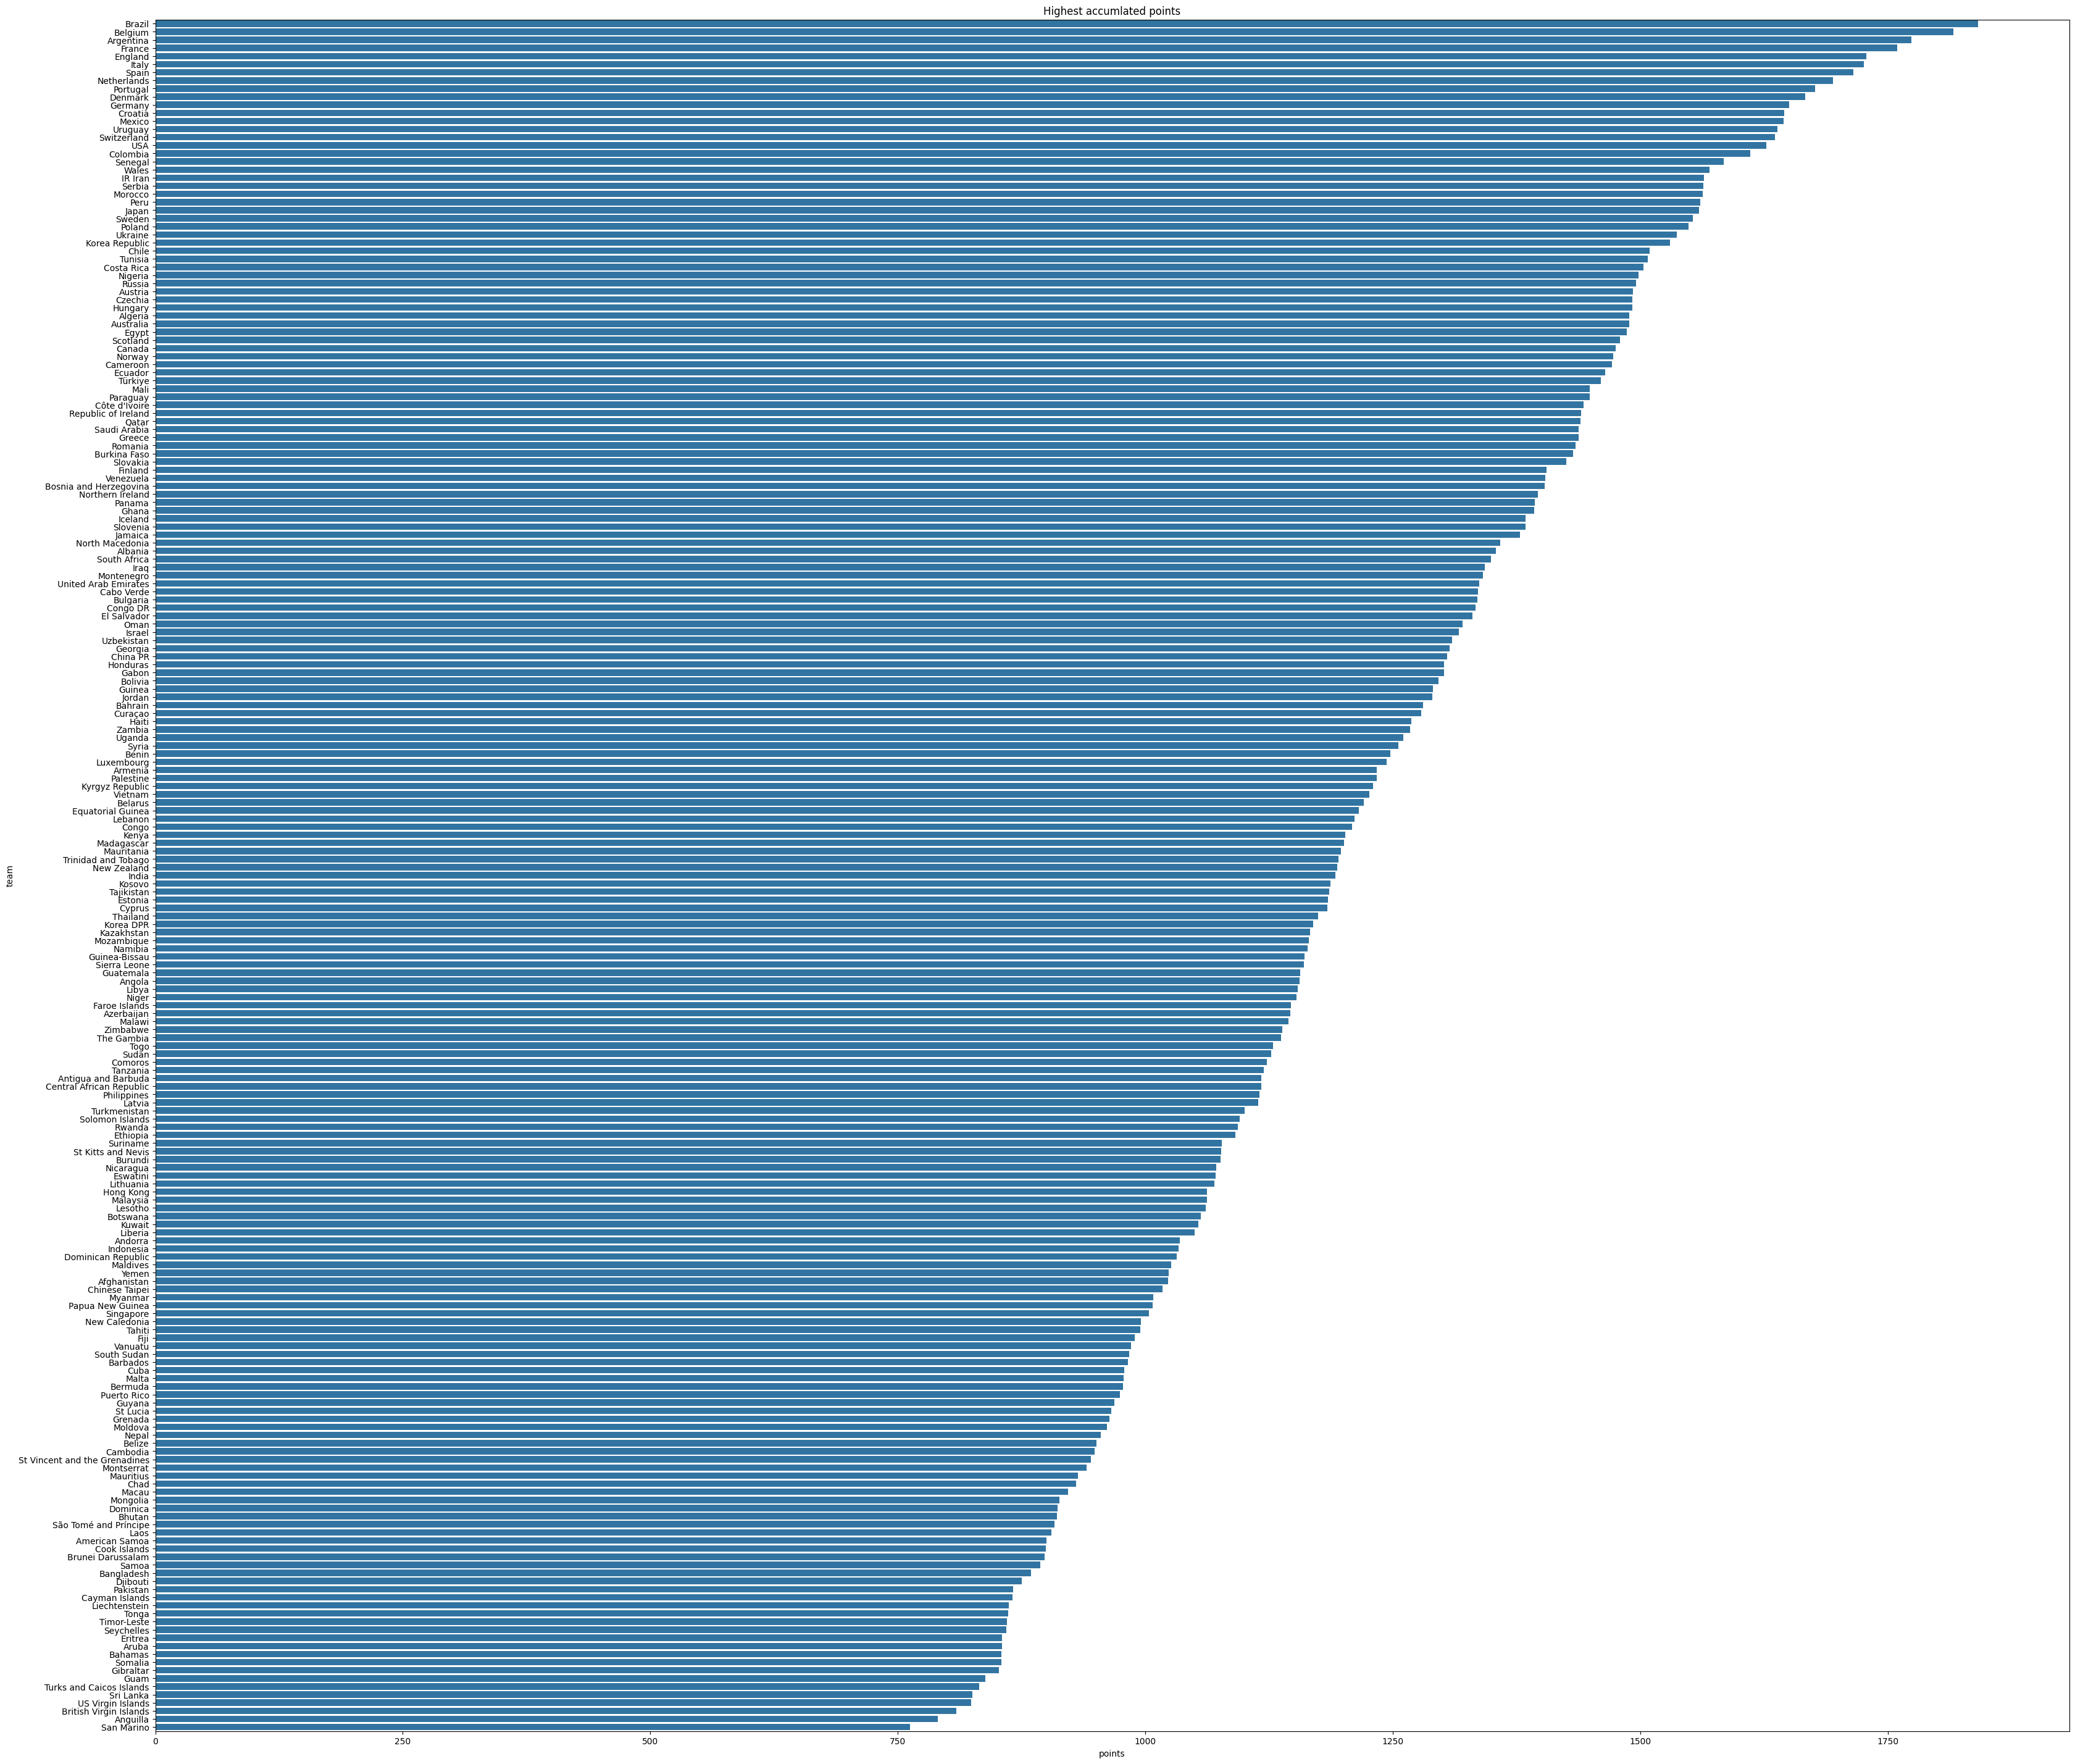

In [27]:
plt.figure(figsize=(40, 36))
plt.title("Highest accumlated points")
sns.barplot(data=ranking, y='team', x='points')
plt.show()

We can see that Brazil has the highest accumlated points, while San Marino has the lowest accumlated points

- **Check the data itself by using methods**

In [28]:
ranking[ranking['points'] == max(ranking['points'])]

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.3,1837.56


In [29]:
ranking[ranking['points']== min(ranking['points'])]

,team,team_code,association,rank,previous_rank,points,previous_points
210,San Marino,SMR,UEFA,211,211,762.22,763.82


## Question 9: Which Team has the highest change in accumlated points?

In [30]:
# Create a new column called change
ranking['change points'] = (ranking['points'] - ranking['previous_points']).abs()
ranking['change points'].head(2)

,change points
0,3.74
1,5.21


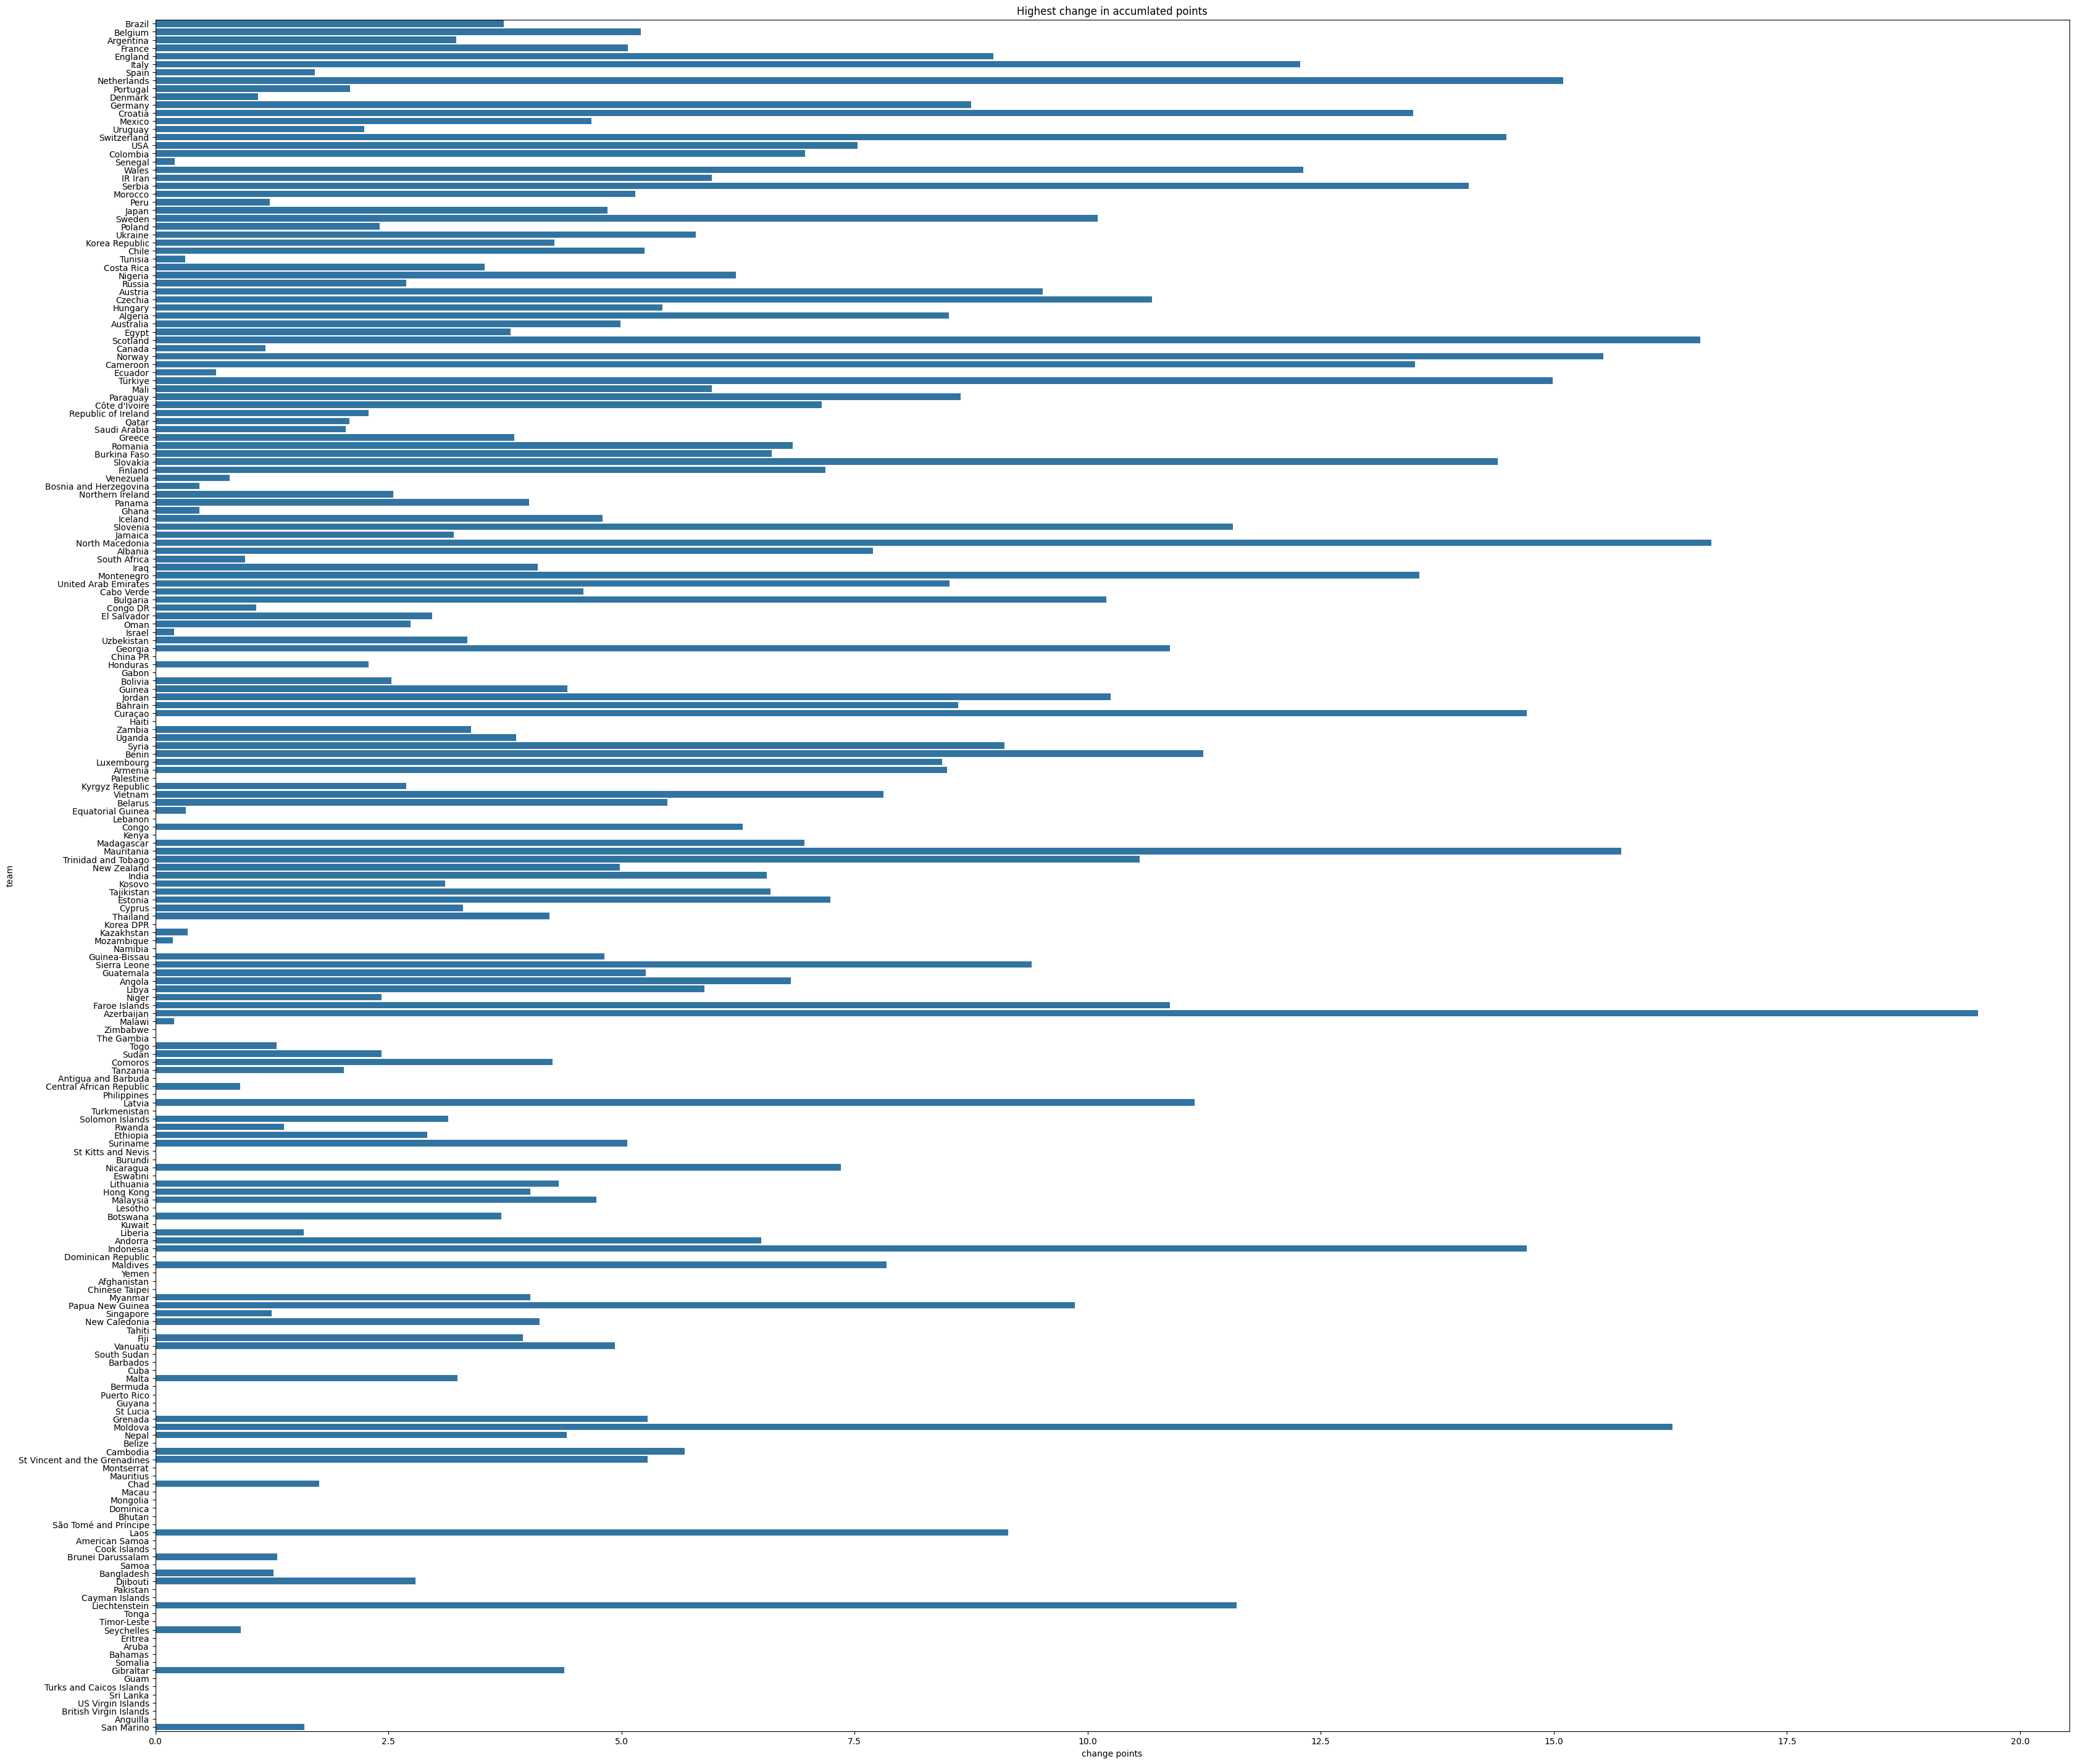

In [31]:
# Create a barplot for this column
plt.figure(figsize=(40, 36))
plt.title("Highest change in accumlated points")
sns.barplot(data=ranking, y="team", x="change points")
plt.show()

Surprisingly, we can see that Azrebaijan has the highest change in its accumlated points with a change of approximately 20 points

- **Check the data itself by using methods**

In [32]:
ranking[ranking['change points'] == max(ranking['change points'])]

,team,team_code,association,rank,previous_rank,points,previous_points,change points
122,Azerbaijan,AZE,UEFA,123,128,1146.72,1127.17,19.55


In [33]:
ranking[ranking['change points'] == min(ranking['change points'])]

,team,team_code,association,rank,previous_rank,points,previous_points,change points
78,China PR,CHN,AFC,79,78,1305.06,1305.06,0.0
80,Gabon,GAB,CAF,81,79,1301.84,1301.84,0.0
86,Haiti,HAI,CONCACAF,87,88,1269.07,1269.07,0.0
93,Palestine,PLE,AFC,94,94,1233.72,1233.72,0.0
98,Lebanon,LBN,AFC,99,100,1211.71,1211.71,0.0
100,Kenya,KEN,CAF,101,102,1202.26,1202.26,0.0
111,Korea DPR,PRK,AFC,112,112,1169.96,1169.96,0.0
114,Namibia,NAM,CAF,115,117,1164.13,1164.13,0.0
124,Zimbabwe,ZIM,CAF,125,123,1138.56,1138.56,0.0
125,The Gambia,GAM,CAF,126,124,1137.47,1137.47,0.0


## Question 10: Which team has the highest rank?

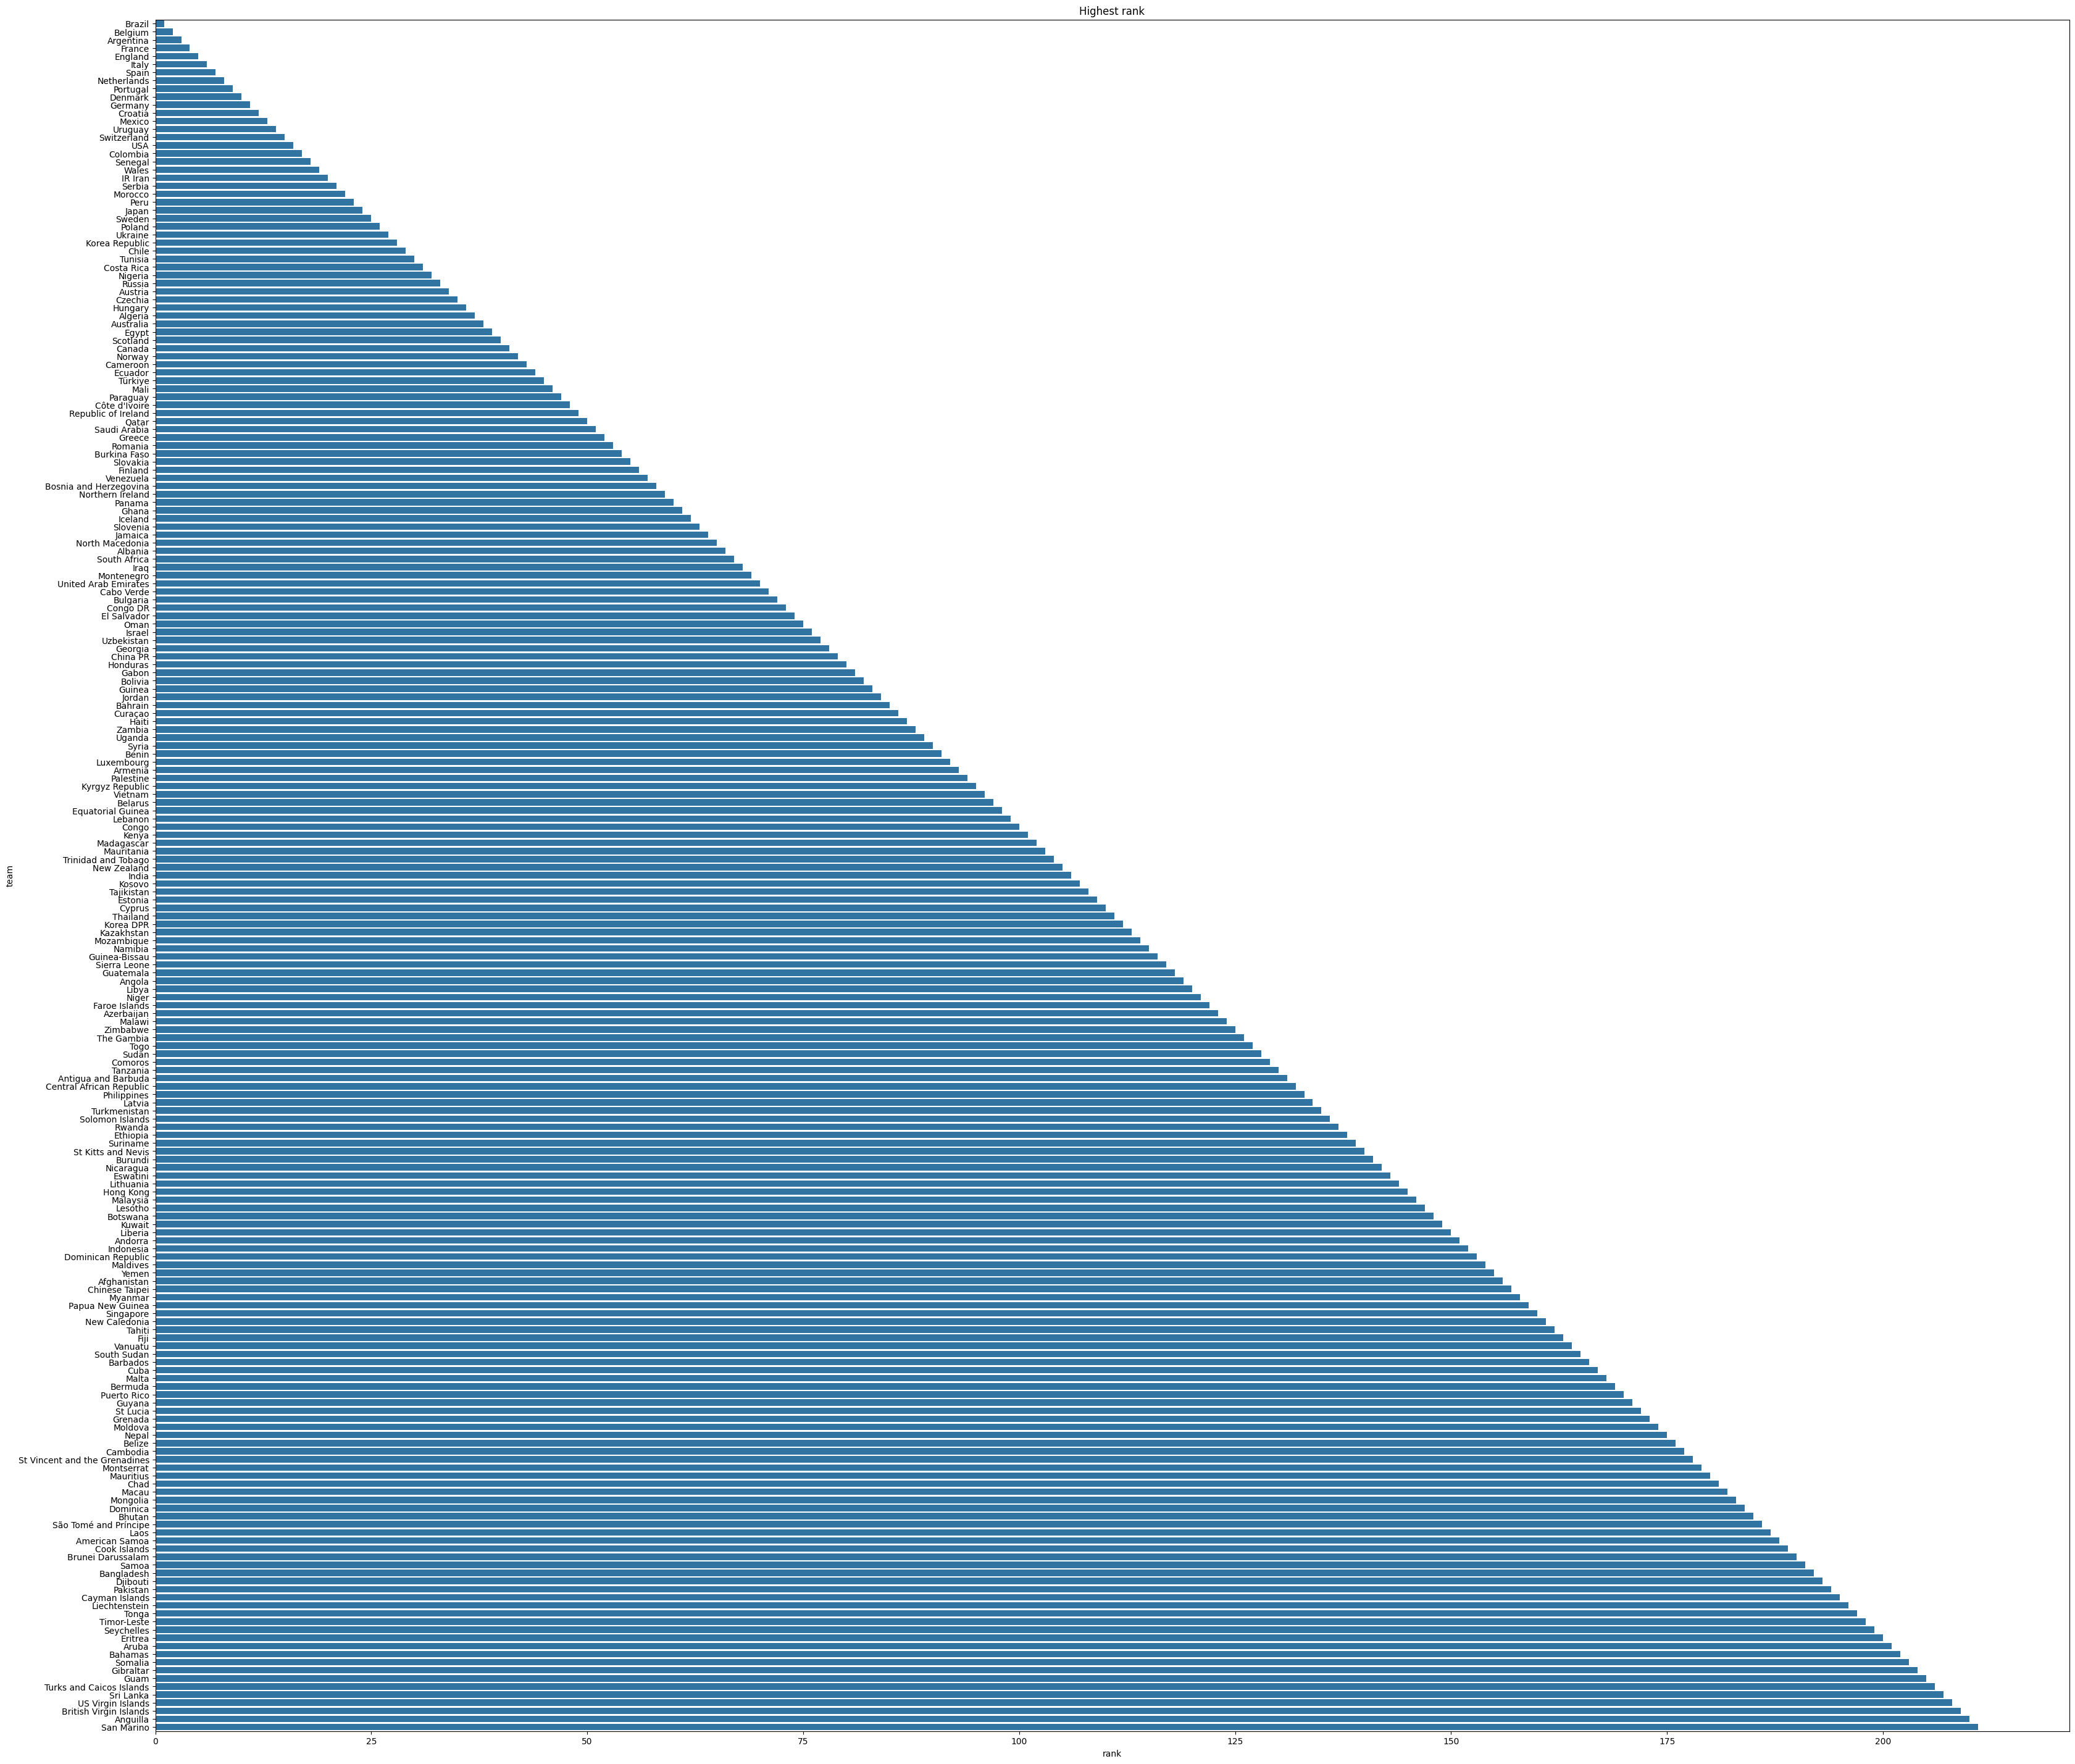

In [34]:
plt.figure(figsize=(40, 36))
plt.title("Highest rank")
sns.barplot(data=ranking, y="team", x="rank")
plt.show()

As expected, Brazil has the #1 ranking, while San Marino has the #211 i.e. last rank, which suggests that there is a relation between ranking and number of accumlated points

## Question 11: Which team has changed most in its rank?

In [35]:
# Create a column for the dfference in ranking
ranking['change rank'] = (ranking['rank'] - ranking['previous_rank']).abs()
ranking.sample(2)

,team,team_code,association,rank,previous_rank,points,previous_points,change points,change rank
106,Kosovo,KOS,UEFA,107,106,1187.01,1183.90,3.11,1
81,Bolivia,BOL,CONMEBOL,82,81,1296.28,1298.81,2.53,1


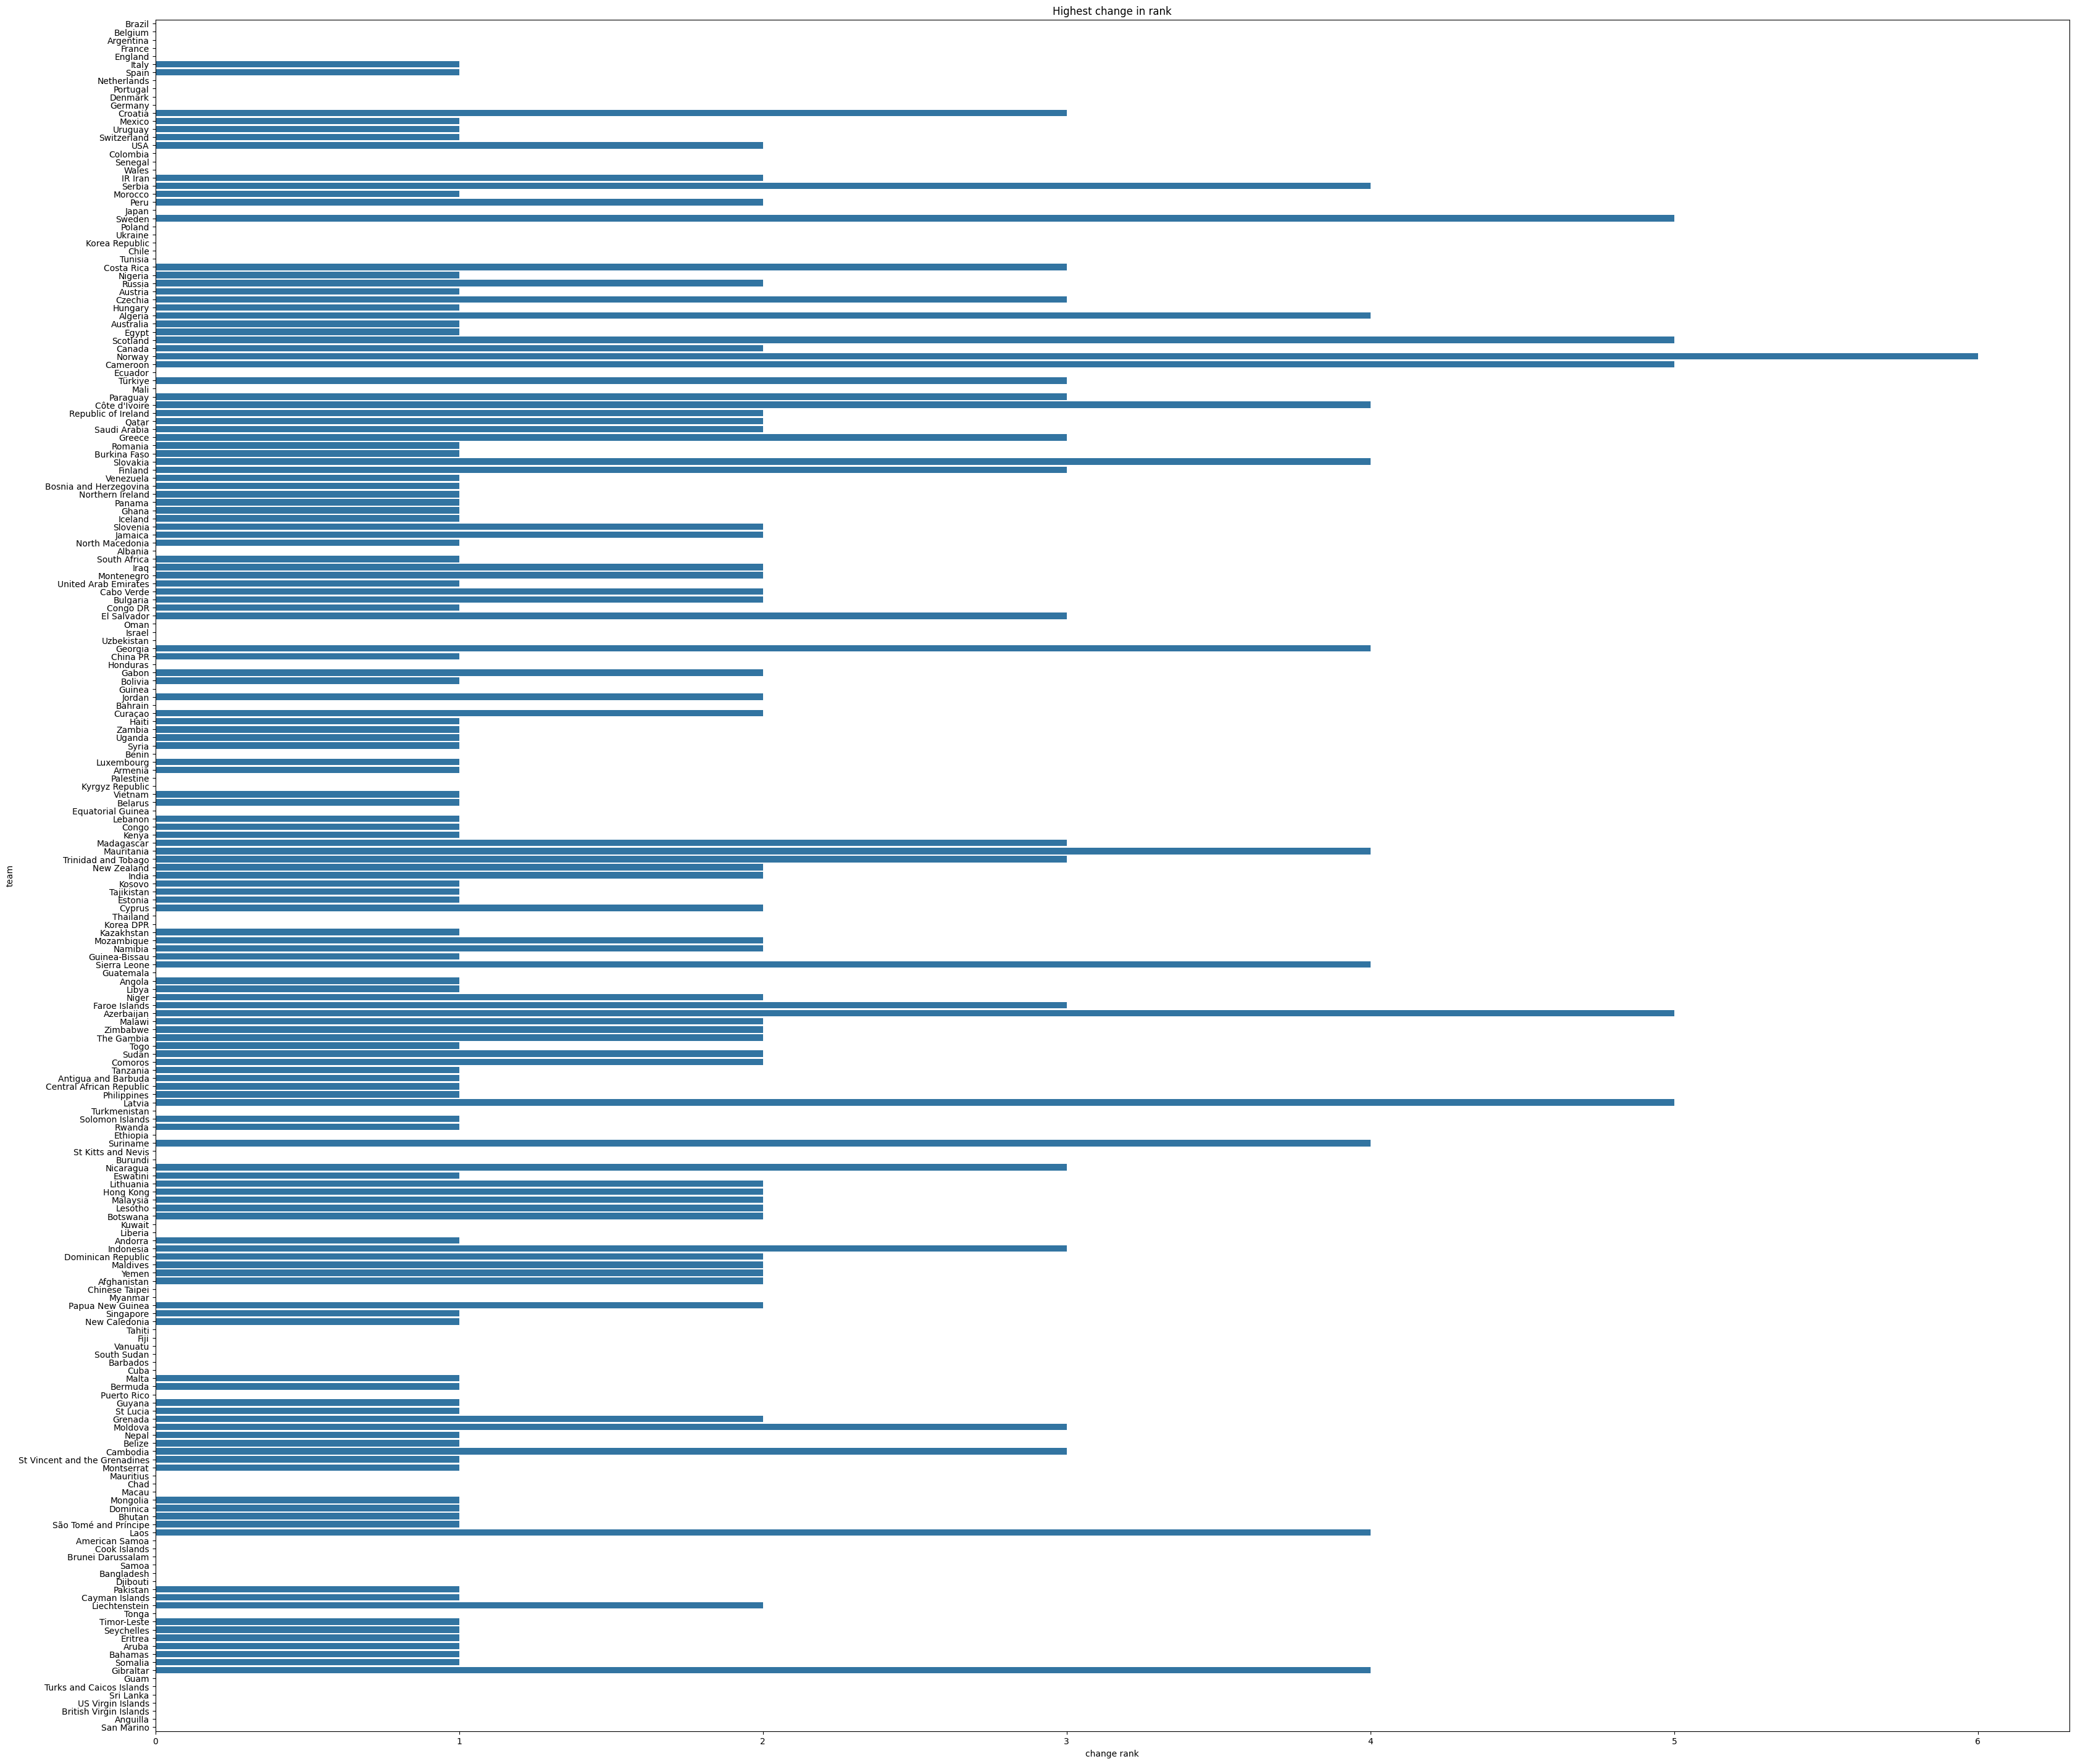

In [36]:
# Create a barplot to see difference in ranking
plt.figure(figsize=(40, 36))
plt.title("Highest change in rank")
sns.barplot(data=ranking, y="team", x="change rank")
plt.show()

We can see that Norway is te most team changing ranks, but we can notice a general rule:<br>
- **Very weak or very strong teams don't experience much difference in their ranking, but middle teams are the ones who experience very high rates of changing ranks**

- **Check the data itself by using methods**

In [37]:
ranking[ranking['change rank'] == max(ranking['change rank'])]

,team,team_code,association,rank,previous_rank,points,previous_points,change points,change rank
41,Norway,NOR,UEFA,42,36,1473.04,1488.57,15.53,6


In [38]:
ranking[ranking['change rank'] == min(ranking['change rank'])]

,team,team_code,association,rank,previous_rank,points,previous_points,change points,change rank
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56,3.74,0
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92,5.21,0
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65,3.23,0
3,France,FRA,UEFA,4,4,1759.78,1764.85,5.07,0
4,England,ENG,UEFA,5,5,1728.47,1737.46,8.99,0
...,...,...,...,...,...,...,...,...,...
206,Sri Lanka,SRI,AFC,207,207,825.25,825.25,0.00,0
207,US Virgin Islands,VIR,CONCACAF,208,208,823.97,823.97,0.00,0
208,British Virgin Islands,VGB,CONCACAF,209,209,809.32,809.32,0.00,0
209,Anguilla,AIA,CONCACAF,210,210,790.74,790.74,0.00,0


## Question 12: What is the relation between accumlated points and ranking?

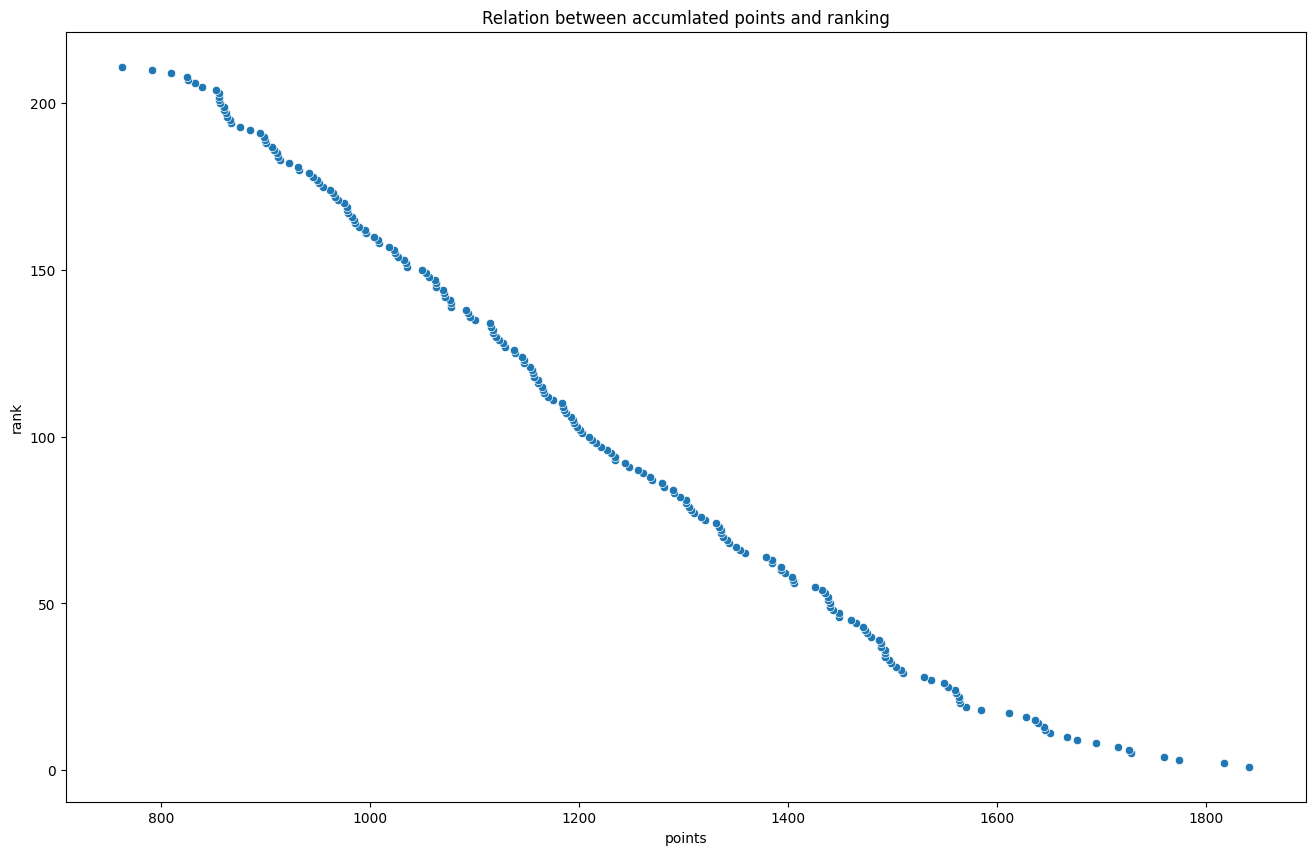

In [39]:
plt.figure(figsize=(16, 10))
plt.title("Relation between accumlated points and ranking")
sns.scatterplot(data=ranking, x='points', y='rank')
plt.show()

There is a positive correlation between ranking and number of accumlated points. Meaning that the more accumlated points a team get, the higher the rank is , the lower its value (which explains why the scatter plot is negatively correlated)

## Question 13: In which year has the top goalscorer scored the highest?

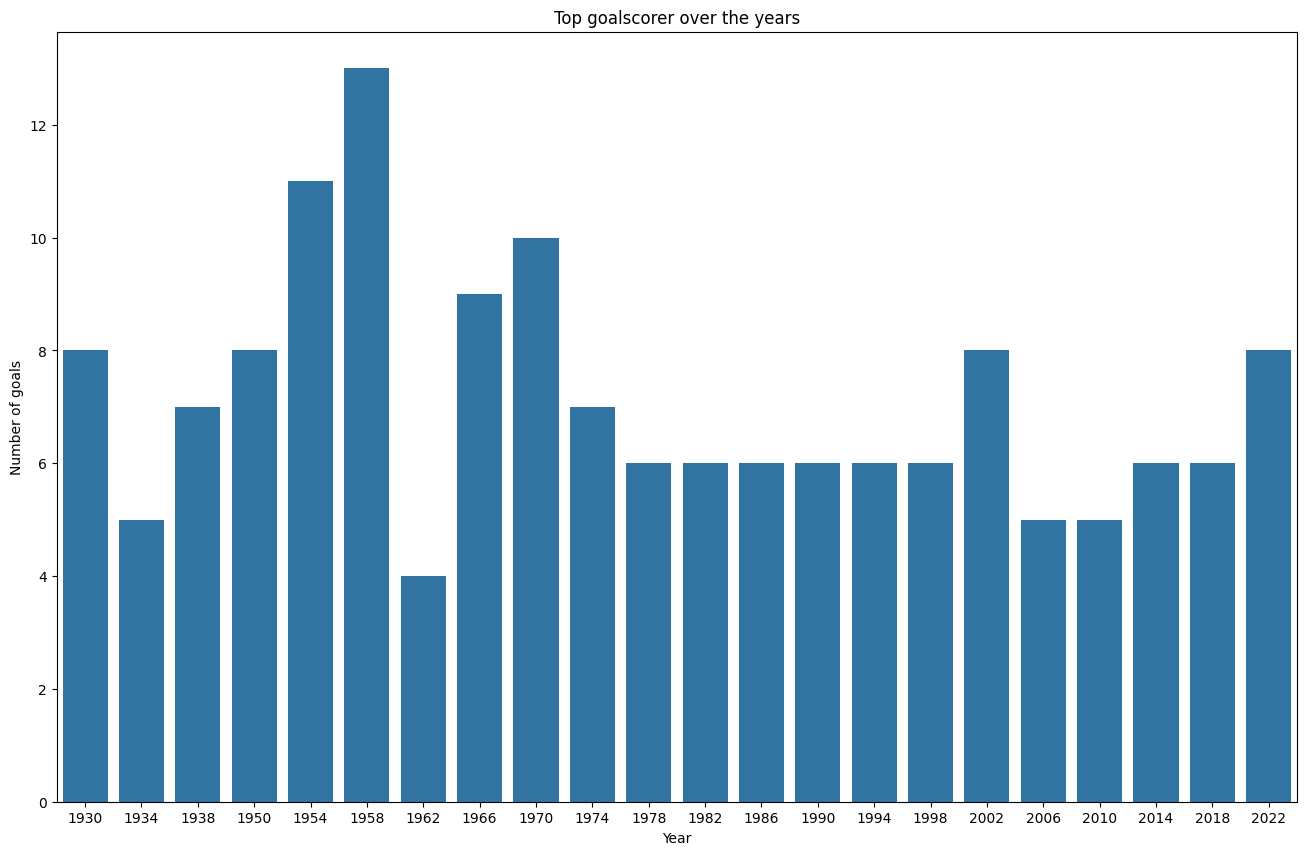

In [40]:
plt.figure(figsize=(16, 10))
plt.title("Top goalscorer over the years")
sns.barplot(data=general, x='Year', y='Number of goals')
plt.show()

We can see that the highest year the top goal scorer has scored was 1958 with 13 goals, while the lowest year was 1962 with 4 goals only

- **Check the data itself by using methods**

In [41]:
general[general['Number of goals'] == max(general['Number of goals'])]

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Number of goals,Attendance,AttendanceAvg,Matches
16,1958,Sweden,16,Brazil,Sweden,Just Fontaine,13,819810,23423,35


In [42]:
general[general['Number of goals'] == min(general['Number of goals'])]

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Number of goals,Attendance,AttendanceAvg,Matches
15,1962,Chile,16,Brazil,Czechoslovakia,"Leonel Sánchez, Flórián Albert...",4,893172,27912,32


#
---
---

# 3. Data analysis report

- **Datasets:**

1.   A csv file for general data about the world cup
2.   A csv file for data about ranking of teams competing in world cup qualifications

- **Questions:**

1. Which teams have won the world cup, and which team has won it the most ?
2. Which teams are the most runner-ups?
3. Which countries host world cup?
4. How did the number of attendance change throughout the years (The overall of the championship)?
5. How did the number of matches change throughout the years?
6. How did the number of teams change throughout the years?
7. How many teams from each federation have competed in World cup qualifications?
8. Which team has the highest accumlated points?
9. Which Team has the highest change in accumlated points?
10. Which team has the highest rank?
11. Which team has changed most in its rank?
12. What is the relation between accumlated points and ranking?
13. In which year has the top goalscorer scored the highest?

- **Wrangling datasets:**<br>
I have carefully assessed the datasets for both cleanliness and tidiness issues

- **Issues found:**<br>
A tidiness issue was found in the general dataset, because the top goalscorer column expressed two values: Name and number of goals

- **How it was cleaned:**<br>
By separating the number of goals in a separate column

- **Analysis results:**<br>
After wrangling the datasets, we started to answer the questions according to the data given

1. Brazil is the most-titled team with 5 titles, while Spain and England are the least-titled with 1 title each

2. Netherlands, Argentina and West Germany are the most runner-ups with 3 times each

3. Brazil, Germany, France, Italy and Mexico are the most hosts with 2 times each

4. The highest attendance was in 1994 Fifa World cup, the least was 1934 Fifa World cup

5. The number of matches experienced inconsistency from 1930 ~ 1978, and was more consistent 1982 ~ 2022, currently 64 matches

6. The number of teams was inconsistent from 1930 ~ 1978, and was more consistent 1982 ~ 2022, currently 32 teams

7. Countries from the UEFA federation represented the highest percentage (26.1%), followed by CAF , then AFC federations

8. Brazil had the highest accumlated points, while San Marino had the lowest accumlated points

9. Azerbaijan had the highest change in accumlated points

10. Brazil had the highest rank, while San Marino had the least one

11. Norway was the most team experiencing rank change

12. There is a direct relation between ranking and number of accumlated points

13. The 1962 World cup had seen the least goals scored by top goalscorers compared to other World Cups (4 goals), whereas 1958 World Cup had seen the highest (13 goals)

- **Limitations:**<br>
The lack of time prevented me from diving deeper into this data and see more diverse aspects of it